### Sentiment Analysis on Amazon Fine Food Reviews

This project performs sentiment analysis on customer reviews using Natural Language Processing (NLP) techniques.

The objective is to classify reviews into Positive, Negative, and Neutral categories and extract meaningful business insights.

In [2]:
import os
os.listdir()

['.ipynb_checkpoints',
 'CodeAlpha_Task4_Sentiment_Analysis.ipynb',
 'Reviews.csv']

##  Import Required Libraries

In this section, we import essential libraries for data handling, visualization, NLP processing, and word cloud generation.

In [6]:
pip install textblob wordcloud

   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 624.3/624.3 kB 7.7 MB/s  0:00:00

   ---------------------------------------- 2/2 [textblob]

Note: you may need to restart the kernel to use updated packages.


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from textblob import TextBlob
from wordcloud import WordCloud

##  Load and Preview Dataset

We load a sample of the Amazon Fine Food Reviews dataset (15,000 rows) to perform sentiment analysis efficiently.

In [8]:
df = pd.read_csv("Reviews.csv", nrows=15000)
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


##  Data Cleaning

We keep only the relevant columns (Score and Text) and remove missing values to prepare the dataset for analysis.

In [9]:
df = df[['Score', 'Text']]
df.dropna(inplace=True)
df.head()

,Score,Text
0,5,I have bought several of the Vitality canned d...
1,1,Product arrived labeled as Jumbo Salted Peanut...
2,4,This is a confection that has been around a fe...
3,2,If you are looking for the secret ingredient i...
4,5,Great taffy at a great price. There was a wid...


##  Sentiment Classification Using TextBlob

We use TextBlob to calculate sentiment polarity for each review and classify it as Positive, Negative, or Neutral.

In [10]:
def get_sentiment(text):
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity
    
    if polarity > 0:
        return "Positive"
    elif polarity < 0:
        return "Negative"
    else:
        return "Neutral"

In [11]:
df['Sentiment'] = df['Text'].apply(get_sentiment)
df.head()

,Score,Text,Sentiment
0,5,I have bought several of the Vitality canned d...,Positive
1,1,Product arrived labeled as Jumbo Salted Peanut...,Negative
2,4,This is a confection that has been around a fe...,Positive
3,2,If you are looking for the secret ingredient i...,Positive
4,5,Great taffy at a great price. There was a wid...,Positive


##  Sentiment Distribution Analysis

This section visualizes the overall distribution of sentiment across customer reviews.

In [12]:
df['Sentiment'].value_counts()

Sentiment
Positive    13298
Negative     1479
Neutral       223
Name: count, dtype: int64

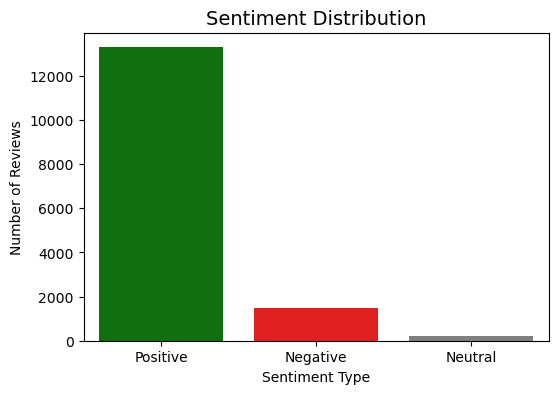

In [15]:
plt.figure(figsize=(6,4))
sns.countplot(x='Sentiment', data=df, hue='Sentiment',
              palette={'Positive':'green',
                       'Negative':'red',
                       'Neutral':'gray'},
              legend=False)

plt.title("Sentiment Distribution", fontsize=14)
plt.xlabel("Sentiment Type")
plt.ylabel("Number of Reviews")
plt.show()

##  Rating vs Sentiment Comparison

Here, we analyze how customer ratings (1–5 stars) align with detected sentiment.

In [16]:
pd.crosstab(df['Score'], df['Sentiment'])

Sentiment,Negative,Neutral,Positive
Score,,,
1,619,59,747
2,202,18,620
3,171,19,1063
4,112,21,1999
5,375,106,8869


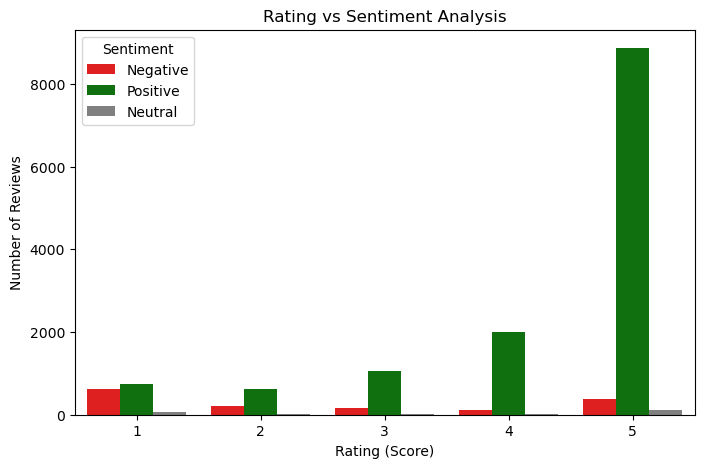

In [17]:
plt.figure(figsize=(8,5))
sns.countplot(x='Score', hue='Sentiment', data=df,
              palette={'Positive':'green','Negative':'red','Neutral':'gray'})

plt.title("Rating vs Sentiment Analysis")
plt.xlabel("Rating (Score)")
plt.ylabel("Number of Reviews")
plt.show()

### Rating vs Sentiment Insight

Most 4-star and 5-star reviews are classified as Positive, showing strong alignment between rating and sentiment.

However, some 1-star reviews are detected as Positive. This highlights limitations of simple sentiment models like TextBlob, which may misclassify mixed or sarcastic reviews.

##  Word Cloud: Positive Reviews

This visualization highlights the most frequently used words in positive customer reviews.

In [18]:
positive_text = " ".join(df[df['Sentiment'] == "Positive"]['Text'])

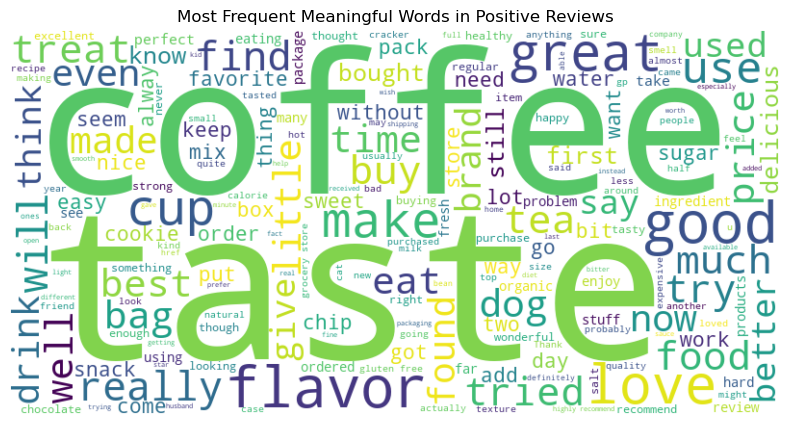

In [20]:
from wordcloud import STOPWORDS

custom_stopwords = set(STOPWORDS)
custom_stopwords.update(["br", "one", "product", "amazon", "would", "get", "also"])

positive_text = " ".join(df[df['Sentiment'] == "Positive"]['Text'])

wordcloud = WordCloud(width=800,
                      height=400,
                      background_color='white',
                      stopwords=custom_stopwords,
                      max_words=200).generate(positive_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Frequent Meaningful Words in Positive Reviews")
plt.show()

### Word Cloud Insight (Positive Reviews)

The most frequent words in positive reviews include "coffee", "taste", "flavor", "great", and "love".

This indicates that customers mainly appreciate product taste, quality, and overall experience.

The word cloud confirms strong customer satisfaction in terms of product flavor and usability.

##  Word Cloud: Negative Reviews

This section identifies commonly used words in negative reviews to understand customer dissatisfaction.

In [21]:
negative_text = " ".join(df[df['Sentiment'] == "Negative"]['Text'])

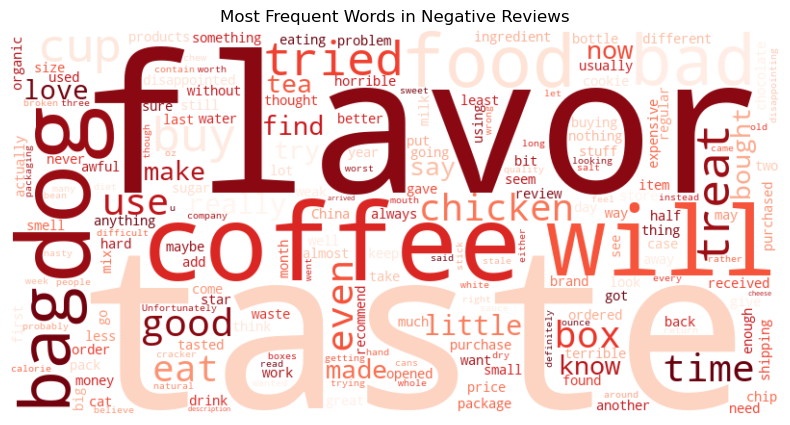

In [22]:
wordcloud_neg = WordCloud(width=800,
                          height=400,
                          background_color='white',
                          stopwords=custom_stopwords,
                          max_words=200,
                          colormap='Reds').generate(negative_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis("off")
plt.title("Most Frequent Words in Negative Reviews")
plt.show()

### Word Cloud Insight (Negative Reviews)

Negative reviews frequently mention words like "flavor", "taste", "bad", and "box".

This suggests that customer dissatisfaction is mainly related to product taste, quality consistency, and packaging issues.

Taste-related complaints appear to be the most common negative factor.

#  Final Conclusion

This sentiment analysis project examined customer reviews from Amazon Fine Food Reviews dataset.

## Key Findings:

- The majority of reviews are classified as **Positive**, indicating overall customer satisfaction.
- 4-star and 5-star ratings strongly align with positive sentiment.
- Some 1-star reviews were detected as positive, highlighting limitations of rule-based sentiment analysis models like TextBlob.
- Word cloud analysis revealed that:
  - Positive reviews frequently mention words like "coffee", "taste", "great", and "love".
  - Negative reviews often focus on "flavor", "bad", and packaging-related concerns.

## Business Insights:

- Product taste and flavor are the most influential factors in customer satisfaction.
- Improving taste consistency and packaging quality may reduce negative reviews.
- Advanced sentiment models (e.g., machine learning or deep learning) could improve classification accuracy.

This project demonstrates the application of Natural Language Processing (NLP) techniques to extract meaningful insights from customer feedback data.